### 전처리(Preprocessing)
* 원본 raw 데이터의 품질이 좋지 않아서 가공하여 데이터의 품질을 향상시키는 과정

#### 피처 스케일링
#### (1) 표준화(Standardization) : 데이터가 평균으로 부터 얼마나 떨어져 있는지를 나타내 값으로, 특정 범위를 벗어난 데이터를 이상치(outlier)로 간주하여 제거 한다, StandardScaler 사용, Z = (X - mean())/std()  , 정규분포, 가우시안분포(평균=0,분산=1)

#### (2) 정규화(Normalization) : 데이터의 범위를 일치시키거나 분포를 유사하게 만들어 주는 기능, 데이터의 범위를 0 ~ 1사이의 값으로 변환, MinMaxScaler, Z = (X-min())/(max()-min())


### 데이터 분석 절차
#### 데이터를 표준화를 통해 outlier를 제거하고, 그 다음에 데이터 정규화를하여 상대적 크기의 영향력을 줄인 다음 분석을 시작한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 표준화(Standardization)

In [2]:
# (1) numpy 를 이용한 표준화
# Z = (X - mean())/std()

data = np.random.randint(1000,size=(3,4)) # 0~999가지의 정수 ,(3,4) 2차원 배열
print('raw_data:\n',data)

data_stand_np = (data - np.mean(data, axis=0))/np.std(data,axis=0)
print('numpy standardized data:\n', data_stand_np)

raw_data:
 [[213 596   3  34]
 [ 95 661 523 311]
 [781 260 161 525]]
numpy standardized data:
 [[-0.50088382  0.51405292 -1.03828606 -1.27363709]
 [-0.89491242  0.88394339  1.35069071  0.10447804]
 [ 1.39579624 -1.39799631 -0.31240465  1.16915905]]


In [3]:
# (2) scipy.stats 를 이용한 표준화 : zscore()
import scipy.stats as ss

data_stand_ss = ss.zscore(data)
print('scipy standardized data:\n',data_stand_ss)

scipy standardized data:
 [[-0.50088382  0.51405292 -1.03828606 -1.27363709]
 [-0.89491242  0.88394339  1.35069071  0.10447804]
 [ 1.39579624 -1.39799631 -0.31240465  1.16915905]]


In [4]:
# (3) sklearn.preprocessing 를  이용한 표준화
# StandardScaler().fit_transform()  (fit() --> transform())

from sklearn.preprocessing import StandardScaler

data_stand_skl = StandardScaler().fit_transform(data)
print('sklearn standardized data:\n',data_stand_skl)

# 동일한 구현
sc = StandardScaler()   # 클래스의 인스턴스를 생성
sc.fit(data)
data_stand_skl = sc.transform(data)
print('sklearn standardized data:\n',data_stand_skl)

sklearn standardized data:
 [[-0.50088382  0.51405292 -1.03828606 -1.27363709]
 [-0.89491242  0.88394339  1.35069071  0.10447804]
 [ 1.39579624 -1.39799631 -0.31240465  1.16915905]]
sklearn standardized data:
 [[-0.50088382  0.51405292 -1.03828606 -1.27363709]
 [-0.89491242  0.88394339  1.35069071  0.10447804]
 [ 1.39579624 -1.39799631 -0.31240465  1.16915905]]


### 정규화(Normalization)

In [5]:
# (1) numpy를 이용한 정규화 : 0 ~ 1 범위
# Z = (X-min())/(max()-min())

data_minmax_np = (data - np.min(data,axis=0))/(np.max(data,axis=0) 
                                               - np.min(data,axis=0))
print('numpy minmax data:\n',data_minmax_np)

numpy minmax data:
 [[0.17201166 0.83790524 0.         0.        ]
 [0.         1.         1.         0.56415479]
 [1.         0.         0.30384615 1.        ]]


In [6]:
# (2) sklearn.preprocessing 를  이용한 정규화
# MinMaxScaler 클래스 : fit_transform() (fit() -> transform())
from sklearn.preprocessing import MinMaxScaler

data_minmax_skl = MinMaxScaler().fit_transform(data)
print('sklearn minmax data:\n',data_minmax_skl)

# 동일한 구현
sc = MinMaxScaler()   # 클래스의 인스턴스를 생성
sc.fit(data)
data_minmax_skl = sc.transform(data)
print('sklearn minmax data:\n',data_minmax_skl)

sklearn minmax data:
 [[0.17201166 0.83790524 0.         0.        ]
 [0.         1.         1.         0.56415479]
 [1.         0.         0.30384615 1.        ]]
sklearn minmax data:
 [[0.17201166 0.83790524 0.         0.        ]
 [0.         1.         1.         0.56415479]
 [1.         0.         0.30384615 1.        ]]


### 이상치를 제거하여 표준화 하기

raw data:
 [ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021  0.43302619  1.20303737
 -0.96506567  1.02827408  0.22863013  0.44513761 -1.13660221  0.13513688
  1.484537   -1.07980489 -1.97772828 -1.7433723   0.26607016  2.38496733
  1.12369125  1.67262221  0.09914922  1.39799638 -0.27124799  0.61320418
 -0.26731719 -0.54930901  0.1327083  -0.47614201  1.30847308  0.19501328
  0.40020999 -0.33763234  1.25647226 -0.7319695   0.66023155 -0.35087189
 -0.93943336 -0.48933722 -0.80459114 -0.21269764 -0.33914025  0.31216994
  0.56515267 -0.14742026 -0.02590534  0.2890942  -0.53987907  0.70816002
  0.84222474  0.2035808   2.39470366  0.91745894 -0.11227247 -0.36218045
 -0.23218226 -0.5017289   1.12878515 -0.69781003 -0.08112218 -0.52929608
  1.04618286 -1.41855603 -0.36249918 -0.12190569  0.31935642  0.4609029
 -0.21578989  0.98907246  0.31475378  2.46765106 -1.50832149  0.62060066
 -1.04513254 -0.79800882  1.98508459  1.7

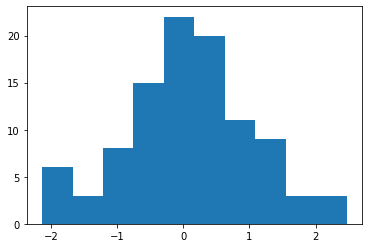

In [7]:
np.random.seed(10)
data = np.random.randn(100) # 정규 분포를 이루는 random, 100개
print('raw data:\n',data)
print(np.min(data),np.max(data))
plt.hist(data)     # 정규성이 있다
plt.show()

In [8]:
data[98:] = 100
print('insert outlier data:\n',data)
print(np.min(data),np.max(data))
plt.hist(data)   # 정규성이 없다
plt.show()

insert outlier data:
 [ 1.33158650e+00  7.15278974e-01 -1.54540029e+00 -8.38384993e-03
  6.21335974e-01 -7.20085561e-01  2.65511586e-01  1.08548526e-01
  4.29143093e-03 -1.74600211e-01  4.33026190e-01  1.20303737e+00
 -9.65065671e-01  1.02827408e+00  2.28630130e-01  4.45137613e-01
 -1.13660221e+00  1.35136878e-01  1.48453700e+00 -1.07980489e+00
 -1.97772828e+00 -1.74337230e+00  2.66070164e-01  2.38496733e+00
  1.12369125e+00  1.67262221e+00  9.91492158e-02  1.39799638e+00
 -2.71247988e-01  6.13204185e-01 -2.67317189e-01 -5.49309014e-01
  1.32708296e-01 -4.76142015e-01  1.30847308e+00  1.95013279e-01
  4.00209988e-01 -3.37632337e-01  1.25647226e+00 -7.31969502e-01
  6.60231551e-01 -3.50871891e-01 -9.39433360e-01 -4.89337217e-01
 -8.04591142e-01 -2.12697639e-01 -3.39140246e-01  3.12169936e-01
  5.65152670e-01 -1.47420258e-01 -2.59053368e-02  2.89094204e-01
 -5.39879071e-01  7.08160020e-01  8.42224738e-01  2.03580797e-01
  2.39470366e+00  9.17458938e-01 -1.12272471e-01 -3.62180447e-01
 -2

standardized data:
 [[-0.05414927]
 [-0.09811235]
 [-0.25937343]
 [-0.14973341]
 [-0.10481359]
 [-0.20050124]
 [-0.13019562]
 [-0.14139227]
 [-0.14882924]
 [-0.16159012]
 [-0.11824629]
 [-0.06331907]
 [-0.21797641]
 [-0.07578546]
 [-0.13282648]
 [-0.11738235]
 [-0.23021263]
 [-0.13949564]
 [-0.04323885]
 [-0.2261611 ]
 [-0.29021269]
 [-0.27349537]
 [-0.13015577]
 [ 0.02099156]
 [-0.06897907]
 [-0.02982217]
 [-0.14206275]
 [-0.04941206]
 [-0.1684843 ]
 [-0.10539365]
 [-0.1682039 ]
 [-0.18831923]
 [-0.13966888]
 [-0.18310001]
 [-0.05579802]
 [-0.13522447]
 [-0.12058717]
 [-0.17321969]
 [-0.0595074 ]
 [-0.20134896]
 [-0.10203905]
 [-0.17416411]
 [-0.21614798]
 [-0.18404126]
 [-0.20652928]
 [-0.16430773]
 [-0.17332726]
 [-0.12686734]
 [-0.10882131]
 [-0.15965129]
 [-0.15098327]
 [-0.1285134 ]
 [-0.18764656]
 [-0.09862017]
 [-0.08905693]
 [-0.13461333]
 [ 0.02168608]
 [-0.08369024]
 [-0.15714409]
 [-0.17497079]
 [-0.16569762]
 [-0.1849252 ]
 [-0.06861571]
 [-0.19891226]
 [-0.15492205]
 [-0.

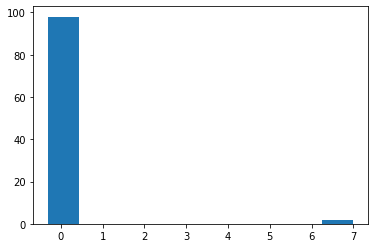

In [9]:
# sklearn 사용 표준화
data.shape     # (100,)   # 1차원
data = data.reshape(-1,1) # 반드시 2차원으로 변경하여 사용, (100,1)
data_stand_skl = StandardScaler().fit_transform(data)
print('standardized data:\n',data_stand_skl)
plt.hist(data_stand_skl)
plt.show()

In [10]:
# 이상치의 경계값을 임의로 5로 결정 : 고정된 답이 아님, IQR을 사용하면 정확한 계산가능
data_stand_skl_zoomin = data_stand_skl[data_stand_skl < 5]
print('zoomin data:\n',data_stand_skl_zoomin)
plt.hist(data_stand_skl_zoomin) # 정규성이 있다
plt.show()

zoomin data:
 [-0.05414927 -0.09811235 -0.25937343 -0.14973341 -0.10481359 -0.20050124
 -0.13019562 -0.14139227 -0.14882924 -0.16159012 -0.11824629 -0.06331907
 -0.21797641 -0.07578546 -0.13282648 -0.11738235 -0.23021263 -0.13949564
 -0.04323885 -0.2261611  -0.29021269 -0.27349537 -0.13015577  0.02099156
 -0.06897907 -0.02982217 -0.14206275 -0.04941206 -0.1684843  -0.10539365
 -0.1682039  -0.18831923 -0.13966888 -0.18310001 -0.05579802 -0.13522447
 -0.12058717 -0.17321969 -0.0595074  -0.20134896 -0.10203905 -0.17416411
 -0.21614798 -0.18404126 -0.20652928 -0.16430773 -0.17332726 -0.12686734
 -0.10882131 -0.15965129 -0.15098327 -0.1285134  -0.18764656 -0.09862017
 -0.08905693 -0.13461333  0.02168608 -0.08369024 -0.15714409 -0.17497079
 -0.16569762 -0.1849252  -0.06861571 -0.19891226 -0.15492205 -0.18689165
 -0.07450798 -0.25032525 -0.17499352 -0.15783126 -0.1263547  -0.11625776
 -0.1645283  -0.07858183 -0.12668302  0.02688964 -0.25672849 -0.10486604
 -0.22368782 -0.20605974 -0.00753328 

In [11]:
# fit_transform() 메서드
from sklearn.base import TransformerMixin

class A(TransformerMixin):
    def fit(self,X):
        print('fit:',X)
        return self
    
    def transform(self,X):
        print('transform:',X)
        return X

inst = A()  # 클래스의 인스턴스 생성
# inst.fit('x_data')
# inst.transform('y_data')
inst.fit_transform('my_data')

fit: my_data
transform: my_data


'my_data'

### 레이블 인코딩(Label Encoding)

In [12]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서', '선풍기','믹서']

encoder = LabelEncoder()  # 클래스의 인스턴스 객체를 생성
encoder.fit(items)
labels = encoder.transform(items)
print('encoding 변환 값:',labels)

encoding 변환 값: [0 1 4 5 3 2 3 2]


In [13]:
print('encoding 클래스:',encoder.classes_)

encoding 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [14]:
print('decoding 원본 값:',encoder.inverse_transform([0,1,3,5,4,2,4,5]))

decoding 원본 값: ['TV' '냉장고' '선풍기' '컴퓨터' '전자레인지' '믹서' '전자레인지' '컴퓨터']


### Boston 주택 가격 예측 전처리

In [15]:
df = pd.read_csv('boston_train.csv')
df

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  TAX  PTRATIO  MEDV
0     2.30040   0.0  19.58  0.605  6.319  96.1  2.1000  403     14.7  23.8
1    13.35980   0.0  18.10  0.693  5.887  94.7  1.7821  666     20.2  12.7
2     0.12744   0.0   6.91  0.448  6.770   2.9  5.7209  233     17.9  26.6
3     0.15876   0.0  10.81  0.413  5.961  17.5  5.2873  305     19.2  21.7
4     0.03768  80.0   1.52  0.404  7.274  38.3  7.3090  329     12.6  34.6
..        ...   ...    ...    ...    ...   ...     ...  ...      ...   ...
395   0.23912   0.0   9.69  0.585  6.019  65.3  2.4091  391     19.2  21.2
396   0.04560   0.0  13.89  0.550  5.888  56.0  3.1121  276     16.4  23.3
397   1.38799   0.0   8.14  0.538  5.950  82.0  3.9900  307     21.0  13.2
398   7.36711   0.0  18.10  0.679  6.193  78.1  1.9356  666     20.2  11.0
399   0.14150   0.0   6.91  0.448  6.169   6.6  5.7209  233     17.9  25.3

[400 rows x 10 columns]

In [16]:
# 전처리 : 표준화
df_stand = StandardScaler().fit_transform(df)  # ndarray, 2차원
df = pd.DataFrame(df_stand, columns=df.columns)
df

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0   -0.171556 -0.483311  1.171334  0.424507  0.060120  0.947403 -0.786047   
1    1.010703 -0.483311  0.959979  1.185594 -0.535048  0.898253 -0.937184   
2   -0.403848 -0.483311 -0.638040 -0.933342  0.681464 -2.324588  0.935411   
3   -0.400500 -0.483311 -0.081090 -1.236047 -0.433098 -1.812023  0.729268   
4   -0.413443  2.924037 -1.407774 -1.313885  1.375827 -1.081793  1.690430   
..        ...       ...       ...       ...       ...       ...       ...   
395 -0.391909 -0.483311 -0.241035  0.251533 -0.353192 -0.133899 -0.639094   
396 -0.412596 -0.483311  0.358758 -0.051172 -0.533671 -0.460396 -0.304872   
397 -0.269094 -0.483311 -0.462387 -0.154957 -0.448253  0.452391  0.112502   
398  0.370079 -0.483311  0.959979  1.064512 -0.113471  0.315473 -0.864206   
399 -0.402345 -0.483311 -0.638040 -0.933342 -0.146536 -2.194692  0.935411   

          TAX   PTRATIO      MEDV  
0   -0.050476 -1.758773  0.122848  
1    1.483792  0.791013 -1.038165  
2   -1.042209 -0.275261  0.415716  
3   -0.622181  0.327416 -0.096803  
4   -0.482172 -2.732328  1.252482  
..        ...       ...       ...  
395 -0.120481  0.327416 -0.149101  
396 -0.791359 -0.970657  0.070550  
397 -0.610513  1.161891 -0.985867  
398  1.483792  0.791013 -1.215978  
399 -1.042209 -0.275261  0.279741  

[400 rows x 10 columns]

In [17]:
# 전처리 : 정규화 , 0 ~ 1 범위
df_minmax = MinMaxScaler().fit_transform(df)  # ndarray, 2차원
df = pd.DataFrame(df_minmax, columns=df.columns)
df

CRIM   ZN     INDUS       NOX        RM       AGE       DIS  \
0    0.025785  0.0  0.700880  0.452675  0.528454  0.959835  0.088243   
1    0.150090  0.0  0.646628  0.633745  0.445679  0.945417  0.059335   
2    0.001361  0.0  0.236437  0.129630  0.614869  0.000000  0.417509   
3    0.001713  0.0  0.379399  0.057613  0.459858  0.150360  0.378079   
4    0.000352  0.8  0.038856  0.039095  0.711439  0.364573  0.561922   
..        ...  ...       ...       ...       ...       ...       ...   
395  0.002617  0.0  0.338343  0.411523  0.470971  0.642636  0.116351   
396  0.000441  0.0  0.492302  0.339506  0.445871  0.546859  0.180278   
397  0.015530  0.0  0.281525  0.314815  0.457751  0.814624  0.260110   
398  0.082734  0.0  0.646628  0.604938  0.504311  0.774459  0.073293   
399  0.001519  0.0  0.236437  0.129630  0.499713  0.038105  0.417509   

          TAX   PTRATIO      MEDV  
0    0.412214  0.223404  0.417778  
1    0.914122  0.808511  0.171111  
2    0.087786  0.563830  0.480000  
3    0.225191  0.702128  0.371111  
4    0.270992  0.000000  0.657778  
..        ...       ...       ...  
395  0.389313  0.702128  0.360000  
396  0.169847  0.404255  0.406667  
397  0.229008  0.893617  0.182222  
398  0.914122  0.808511  0.133333  
399  0.087786  0.563830  0.451111  

[400 rows x 10 columns]

[[-0.31450286  0.09078551 -0.07194825 -0.23116539  0.7031658  -0.09497612
  -0.44238091  0.00500088 -0.2263518 ]]
[0.44962935]


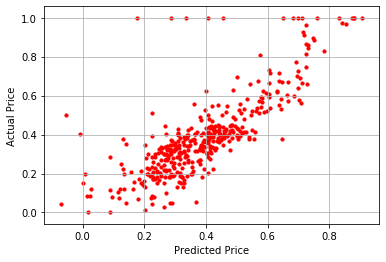

RMSE: 0.12785502011806624
r2_score: 0.637849985054999


In [18]:
# 다항 회귀 모델
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x = df.iloc[:,:-1]      # 9개 컬럼을 피쳐로 사용 , (400,9) , 2차원
# y = df['MEDV'].values.reshape(-1,1)     # (400,1), 2차원, DataFrame
y = df.iloc[:,-1:]                        # (400,1), 2차원, DataFrame

# 클래스의 인스턴스 생성
lr = LinearRegression()

# 학습
lr.fit(x,y)

# 회귀 계수 확인
print(lr.coef_)       # weight 이 9개 생성, 
print(lr.intercept_)  # bias는 1개
                      # H(x1,x2,...,x9) = w1*x1 + w2*x2,....,w9*x9 + b

# 예측
y_pred = lr.predict(x)

# 결과 시각화 : x축을 예측값, y축을 실제값
plt.scatter(y_pred,y,c = 'r', s = 10)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.grid(True)
plt.show()


# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('RMSE:',rmse)   # RMSE: 0.12785502011806624 , 단순히 스케일링으로 인한 감소,정확도 향상 없음

r2 = r2_score(y,y_pred)
print('r2_score:',r2) # r2_score: 0.637849985054999, 정확도 향상 없음

### 앙상블 모델사용 

In [19]:
df = pd.read_csv('boston_train.csv')
x = df.iloc[:,:-1]      # 9개 컬럼을 피쳐로 사용 , (400,9) , 2차원
y = df['MEDV'].values   # (400,), 1차원, ndarray

### RandomForestRegressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,random_state=0)

rf.fit(x,y)  # 학습

y_pred = rf.predict(x)  # 예측

# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('RMSE:',rmse)   # RMSE: 1.7317771332867868 , LinearRegression보다 감소,정확도 증가
r2 = r2_score(y,y_pred)
print('r2_score:',r2) # r2_score: 0.9671895707796678, 정확도 증가

RMSE: 1.7317771332867868
r2_score: 0.9671895707796678


### XGBoost : XGBRegressor

In [21]:
# ! pip install xgboost
from xgboost import XGBRegressor

x_train,y_train = x,y
x_test,y_test = x,y

evals =[(x_test,y_test)]

xgb_wrapper = XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=3)

xgb_wrapper.fit(x_train,y_train,early_stopping_rounds=400,eval_set=evals,
               eval_metric='rmse', verbose=True)

y_pred = xgb_wrapper.predict(x_test)

[0]	validation_0-rmse:21.84370
Will train until validation_0-rmse hasn't improved in 400 rounds.
[1]	validation_0-rmse:19.81568
[2]	validation_0-rmse:17.99740
[3]	validation_0-rmse:16.36960
[4]	validation_0-rmse:14.89697
[5]	validation_0-rmse:13.57208
[6]	validation_0-rmse:12.39708
[7]	validation_0-rmse:11.35147
[8]	validation_0-rmse:10.40381
[9]	validation_0-rmse:9.55481
[10]	validation_0-rmse:8.79851
[11]	validation_0-rmse:8.12908
[12]	validation_0-rmse:7.54437
[13]	validation_0-rmse:7.01170
[14]	validation_0-rmse:6.54889
[15]	validation_0-rmse:6.14220
[16]	validation_0-rmse:5.77109
[17]	validation_0-rmse:5.43815
[18]	validation_0-rmse:5.15685
[19]	validation_0-rmse:4.86338
[20]	validation_0-rmse:4.63641
[21]	validation_0-rmse:4.36953
[22]	validation_0-rmse:4.19635
[23]	validation_0-rmse:4.01448
[24]	validation_0-rmse:3.87042
[25]	validation_0-rmse:3.72403
[26]	validation_0-rmse:3.62040
[27]	validation_0-rmse:3.50650
[28]	validation_0-rmse:3.40963
[29]	validation_0-rmse:3.33230
[30]	

[258]	validation_0-rmse:1.16760
[259]	validation_0-rmse:1.16290
[260]	validation_0-rmse:1.16119
[261]	validation_0-rmse:1.15859
[262]	validation_0-rmse:1.15478
[263]	validation_0-rmse:1.15062
[264]	validation_0-rmse:1.14454
[265]	validation_0-rmse:1.14081
[266]	validation_0-rmse:1.14005
[267]	validation_0-rmse:1.13595
[268]	validation_0-rmse:1.13284
[269]	validation_0-rmse:1.12990
[270]	validation_0-rmse:1.12921
[271]	validation_0-rmse:1.12786
[272]	validation_0-rmse:1.12583
[273]	validation_0-rmse:1.12165
[274]	validation_0-rmse:1.12083
[275]	validation_0-rmse:1.11906
[276]	validation_0-rmse:1.11684
[277]	validation_0-rmse:1.11230
[278]	validation_0-rmse:1.11116
[279]	validation_0-rmse:1.10995
[280]	validation_0-rmse:1.10846
[281]	validation_0-rmse:1.10586
[282]	validation_0-rmse:1.10527
[283]	validation_0-rmse:1.09754
[284]	validation_0-rmse:1.09559
[285]	validation_0-rmse:1.08817
[286]	validation_0-rmse:1.08333
[287]	validation_0-rmse:1.07858
[288]	validation_0-rmse:1.07323
[289]	va

In [22]:
# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('RMSE:',rmse)   # RMSE: 0.767660835104087 , RandomForest 보다 감소,정확도 증가
r2 = r2_score(y,y_pred)
print('r2_score:',r2) # r2_score: 0.9935528662747737, 정확도 증가

RMSE: 0.767660835104087
r2_score: 0.9935528662747737


### LGBMRegressor

In [23]:
# ! pip install lightgbm
from lightgbm import LGBMRegressor
x_train,y_train = x,y
x_test,y_test = x,y

evals =[(x_test,y_test)]

lgbm_wrapper = LGBMRegressor(n_estimators=400,learning_rate=0.1,max_depth=3)

lgbm_wrapper.fit(x_train,y_train,early_stopping_rounds=400,eval_set=evals,
               eval_metric='rmse', verbose=True)

y_pred = lgbm_wrapper.predict(x_test)

[1]	training's rmse: 8.91129	training's l2: 79.4111
Training until validation scores don't improve for 400 rounds
[2]	training's rmse: 8.34279	training's l2: 69.6022
[3]	training's rmse: 7.85188	training's l2: 61.6519
[4]	training's rmse: 7.42553	training's l2: 55.1385
[5]	training's rmse: 7.03911	training's l2: 49.5491
[6]	training's rmse: 6.71376	training's l2: 45.0745
[7]	training's rmse: 6.4094	training's l2: 41.0804
[8]	training's rmse: 6.15205	training's l2: 37.8477
[9]	training's rmse: 5.93181	training's l2: 35.1864
[10]	training's rmse: 5.73627	training's l2: 32.9047
[11]	training's rmse: 5.5679	training's l2: 31.0016
[12]	training's rmse: 5.42094	training's l2: 29.3866
[13]	training's rmse: 5.28649	training's l2: 27.947
[14]	training's rmse: 5.17572	training's l2: 26.7881
[15]	training's rmse: 5.07559	training's l2: 25.7616
[16]	training's rmse: 4.92721	training's l2: 24.2774
[17]	training's rmse: 4.79752	training's l2: 23.0162
[18]	training's rmse: 4.72913	training's l2: 22.3

[158]	training's rmse: 2.40822	training's l2: 5.79952
[159]	training's rmse: 2.4035	training's l2: 5.77682
[160]	training's rmse: 2.39998	training's l2: 5.75989
[161]	training's rmse: 2.39622	training's l2: 5.74185
[162]	training's rmse: 2.39266	training's l2: 5.72482
[163]	training's rmse: 2.38679	training's l2: 5.69675
[164]	training's rmse: 2.38202	training's l2: 5.67401
[165]	training's rmse: 2.37838	training's l2: 5.65671
[166]	training's rmse: 2.37539	training's l2: 5.64249
[167]	training's rmse: 2.3632	training's l2: 5.58471
[168]	training's rmse: 2.35798	training's l2: 5.56009
[169]	training's rmse: 2.35319	training's l2: 5.53752
[170]	training's rmse: 2.35057	training's l2: 5.5252
[171]	training's rmse: 2.34936	training's l2: 5.51949
[172]	training's rmse: 2.34694	training's l2: 5.50812
[173]	training's rmse: 2.3366	training's l2: 5.45972
[174]	training's rmse: 2.33194	training's l2: 5.43796
[175]	training's rmse: 2.32894	training's l2: 5.42396
[176]	training's rmse: 2.3229	tr

[317]	training's rmse: 1.86742	training's l2: 3.48727
[318]	training's rmse: 1.86571	training's l2: 3.48087
[319]	training's rmse: 1.86203	training's l2: 3.46716
[320]	training's rmse: 1.8599	training's l2: 3.45922
[321]	training's rmse: 1.85851	training's l2: 3.45405
[322]	training's rmse: 1.85716	training's l2: 3.44904
[323]	training's rmse: 1.85554	training's l2: 3.44303
[324]	training's rmse: 1.8529	training's l2: 3.43323
[325]	training's rmse: 1.85127	training's l2: 3.42722
[326]	training's rmse: 1.84981	training's l2: 3.4218
[327]	training's rmse: 1.84787	training's l2: 3.41462
[328]	training's rmse: 1.84641	training's l2: 3.40924
[329]	training's rmse: 1.84445	training's l2: 3.40198
[330]	training's rmse: 1.8417	training's l2: 3.39186
[331]	training's rmse: 1.84066	training's l2: 3.38802
[332]	training's rmse: 1.83818	training's l2: 3.3789
[333]	training's rmse: 1.83689	training's l2: 3.37418
[334]	training's rmse: 1.83553	training's l2: 3.36917
[335]	training's rmse: 1.83095	tr

In [24]:
# 정확도 측정
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('RMSE:',rmse)   # RMSE: 1.6934916754841574 , XGBoost 보다 증가,정확도 감소
r2 = r2_score(y,y_pred)
print('r2_score:',r2) # r2_score: 0.9686242553066795,XGBoost 보다 정확도가 약간 감소

RMSE: 1.6934916754841574
r2_score: 0.9686242553066795


### 실습 과제

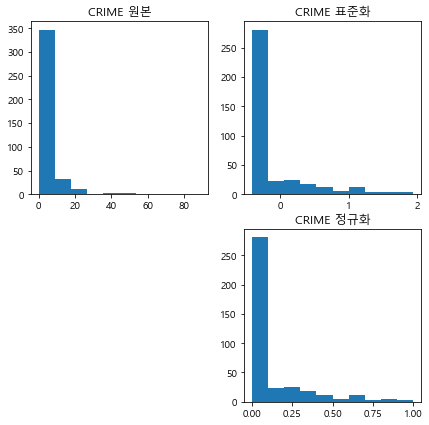

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# import warnings
# warnings.filterwarnings("ignore")


df = pd.read_csv('boston_train.csv')
# df = df.fillna(0)

plt.figure(figsize=[7.0,7.0])  # 글자 겹칩방지를 위해 그래프 사이즈를 크게 조정

# 'CRIM' 원본
crime = df['CRIM'].values
plt.subplot(221)
plt.hist(crime)
plt.title('CRIME 원본')

# 'CRIM' 표준화
crime = crime.reshape(-1,1)
crime_std = StandardScaler().fit_transform(crime)
crime_std_zoomin = crime_std[crime_std < 2]

plt.subplot(222)
plt.hist(crime_std_zoomin)
plt.title('CRIME 표준화')


# 'CRIM' 정규화
crime_std_zoomin = crime_std_zoomin.reshape(-1,1)
crime_minmax = MinMaxScaler().fit_transform(crime_std_zoomin)

plt.subplot(224)
plt.hist(crime_minmax)
plt.title('CRIME 정규화')

plt.show()

In [26]:
# 'ZN' 원본
plt.figure(figsize=[7.0,7.0])

zn = df['ZN'].values
plt.subplot(221)
plt.hist(zn)
plt.title('ZN 원본')

# 'ZN' 표준화
zn = zn.reshape(-1,1)
zn_std = StandardScaler().fit_transform(zn)
# plt.boxplot(zn_std)
# plt.show()
# input()
zn_std_zoomin = zn_std[zn_std < 1]

plt.subplot(222)
plt.hist(zn_std_zoomin)
plt.title('ZN 표준화')


# 'ZN' 정규화
zn_std_zoomin = zn_std_zoomin.reshape(-1,1)
zn_minmax = MinMaxScaler().fit_transform(zn_std_zoomin)

plt.subplot(224)
plt.hist(zn_minmax)
plt.title('ZN 정규화')

plt.show()

In [27]:
# 'TAX' 원본
plt.figure(figsize=[7.0,7.0])

tax = df['TAX'].values
plt.subplot(221)
plt.hist(tax)
plt.title('TAX 원본')

# 'TAX' 표준화
tax = tax.reshape(-1,1)
tax_std = StandardScaler().fit_transform(tax)
tax_std_zoomin = tax_std[tax_std < 0.5]

plt.subplot(222)
plt.hist(tax_std_zoomin)
plt.title('TAX 표준화')


# 'TAX' 정규화
tax_std_zoomin = tax_std_zoomin.reshape(-1,1)
tax_minmax = MinMaxScaler().fit_transform(tax_std_zoomin)

plt.subplot(224)
plt.hist(tax_minmax)
plt.title('TAX 정규화')
plt.show()

In [28]:
# 'MEDV' 원본
plt.figure(figsize=[7.0,7.0])

medv = df['MEDV'].values
plt.subplot(221)
plt.hist(medv)
plt.title('MEDV 원본')

# 'MEDV' 표준화
medv = medv.reshape(-1,1)
medv_std = StandardScaler().fit_transform(medv)
medv_std_zoomin = medv_std[medv_std < 1.8]

plt.subplot(222)
plt.hist(medv_std_zoomin)
plt.title('MEDV 표준화')


# 'MEDV' 정규화
medv_std_zoomin = medv_std_zoomin.reshape(-1,1)
medv_minmax = MinMaxScaler().fit_transform(medv_std_zoomin)

plt.subplot(224)
plt.hist(medv_minmax)
plt.title('MEDV 정규화')
plt.show()

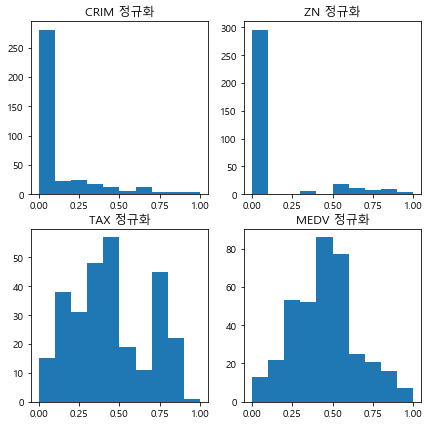

In [29]:
# 최종 결과
plt.figure(figsize=[7.0,7.0])

plt.subplot(221)
plt.hist(crime_minmax)
plt.title('CRIM 정규화')

plt.subplot(222)
plt.hist(zn_minmax)
plt.title('ZN 정규화')

plt.subplot(223)
plt.hist(tax_minmax)
plt.title('TAX 정규화')

plt.subplot(224)
plt.hist(medv_minmax)
plt.title('MEDV 정규화')
plt.show()